# Итоговая работа.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [3]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [4]:
#a) Считаю косинусы для каждой пары векторов. Выбираю пары с наибольшим косинусом
twins = []
for user_1 in range(len(raitings)):
    cos = 0
    twin = []
    for user_2 in range(len(raitings)):
        loc_cos = np.dot(raitings[user_1], raitings[user_2]) / (np.linalg.norm(raitings[user_1]) * np.linalg.norm(raitings[user_2]))
        if user_2 != user_1 and loc_cos > cos:
            cos = loc_cos
            twin = user_2
    twins.append((user_1, twin, cos))
    
twins

[(0, 8, 0.9106598233573044),
 (1, 4, 0.8713805223930228),
 (2, 9, 0.9187305147356807),
 (3, 9, 0.8588686958710952),
 (4, 8, 0.8794847716076252),
 (5, 9, 0.8551490764118892),
 (6, 3, 0.832742107055763),
 (7, 5, 0.8445168512565341),
 (8, 0, 0.9106598233573044),
 (9, 2, 0.9187305147356807)]

In [34]:
#Для проверки считаю расстояние между векторами с помощью матрицы расстояний. Получаю тот же самый результат.
def users_pairs(dataset):
    from sklearn.metrics import pairwise_distances
    from sklearn.metrics.pairwise import pairwise_kernels
    distances = pairwise_distances(dataset, metric='cosine')

    dist_list = []
    n = 0

    for row in distances:
        row_list = list(row)
        dist_list.append((n, (row_list.index(sorted(row_list)[1])), sorted(row_list)[1]))
        n += 1

    return dist_list

users_pairs(raitings)

[(0, 8, 0.08934017664269556),
 (1, 4, 0.12861947760697723),
 (2, 9, 0.08126948526431932),
 (3, 9, 0.14113130412890507),
 (4, 8, 0.12051522839237483),
 (5, 9, 0.1448509235881108),
 (6, 3, 0.16725789294423676),
 (7, 5, 0.1554831487434658),
 (8, 0, 0.08934017664269556),
 (9, 2, 0.08126948526431932)]

In [32]:
#б) В задании четко определено количество признаков, к которым нужно привести векторы. Сначала использую метод PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
trans_raitings = pca.fit_transform(raitings)
print(trans_raitings)

[[-5.30986101  1.92919845 -4.93300027  2.70188013  5.50497886]
 [ 2.87763403  2.71659559  1.40592782  7.26325751 -4.50322291]
 [-4.94010408 -6.68861167 -0.94550184  3.61556661 -0.68969272]
 [ 5.14939908 -6.28027284 -4.65978558  1.09024004 -1.01471112]
 [-1.37488691  7.54357985  4.00834369  2.1284001  -0.16324949]
 [ 2.65341956 -3.77075601  8.58430748 -1.46628319  1.67401769]
 [ 8.61573944  3.78603335 -4.02721027 -4.37582577 -3.13880277]
 [ 5.39658258 -1.0170466   1.01456742 -1.89512837  6.54883538]
 [-5.7843488   5.29857107 -1.48083611 -3.71295542  0.21312695]
 [-7.2835739  -3.51729118  1.03318766 -5.34915166 -4.43127987]]


In [44]:
# Для проверки успешности сжатия сравниваю результат с полученным ранее. Получаю 4 ошибки из 10.
error = 0

for i in range(len(raitings)):
    if users_pairs(trans_raitings)[i][1] != users_pairs(raitings)[i][1]:
        error += 1

print(f'Количество ошибок: {error}')

Количество ошибок: 4
[(0, 8, 0.5384083965060685), (1, 4, 0.5478839675192974), (2, 9, 0.5686063054065575), (3, 6, 0.6555897192888458), (4, 1, 0.5478839675192974), (5, 7, 0.5390188484232838), (6, 3, 0.6555897192888458), (7, 5, 0.5390188484232838), (8, 0, 0.5384083965060685), (9, 8, 0.5666370708459434)]


In [48]:
# Сжимаю матрицу методом TruncatedSVD
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd_raitings = svd.fit_transform(raitings)
svd_raitings

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

In [49]:
# Проверяю количество ошибок - результат чуть лучше, чем у PCA.
error = 0

for i in range(len(raitings)):
    if users_pairs(svd_raitings)[i][1] != users_pairs(raitings)[i][1]:
        error += 1

print(f'Количество ошибок: {error}')

Количество ошибок: 3


## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [58]:
from sympy import *
x = symbols('x')
y = tan(sin(x) + cos (2 * x + 3)) ** 2
y.diff()

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

На бумаге результат немного отличается: вместо множителя tan ** 2(sin(𝑥)+cos(2𝑥+3))+1) получился эквивалентный ему 1 / cos ** 2(sin(𝑥)+cos(2𝑥+3))

In [77]:
print(f'Значение производной в точке x = 1: {y.diff().evalf(subs={x: 1})}')

Значение производной в точке x = 1: 55.3859176353379


In [78]:
import scipy.misc as misc
def f(x):
    return np.tan(np.sin(x) + np.cos (2 * x + 3)) ** 2

print(f'Значение первой производной в точке x = 1: {misc.derivative(f, 1, dx=1e-6)}')

Значение первой производной в точке x = 1: 55.3859176464222


## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [53]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [54]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [55]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

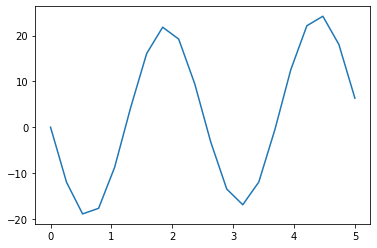

In [56]:
plt.plot(x, fx)
plt.show()

In [146]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [111]:
# Сначала получаю оптимальные значения параметров встроенным методом scipy.
# Делаю несколько попыток, чтобы понять, при какой исходной точке функция будет минимальной.
minimize(error, [0, -1], method='COBYLA')

     fun: 0.08301235468999657
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 51
  status: 1
 success: True
       x: array([ 3.00016546, -2.4998982 ])

In [67]:
minimize(error, [0, 0], method='COBYLA')

     fun: 0.07674566111565184
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 135
  status: 1
 success: True
       x: array([ 3.00018796, -2.50008926])

In [121]:
# При следующих исходных точках значение функции будет возрастать => метод попадает в локальный минимум.
minimize(error, [0, -5], method='COBYLA')

     fun: 0.1039109351118448
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 91
  status: 1
 success: True
       x: array([ 2.99974718, -2.50011511])

In [69]:
minimize(error, [3, 2], method='COBYLA')

     fun: 237.95642915077482
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 41
  status: 1
 success: True
       x: array([1.96271612, 3.32719999])

In [124]:
# Ищу значение параметров методом differential_evolution.
# Судя по результатам, этот метод точнее, чем COBYLA - выдаются точные, а не приблизительные, как ранее, значения параметров.
from scipy.optimize import differential_evolution

differential_evolution(error, bounds = [(-4, 4), (-4, 4)])

     fun: 1.5105974213724949e-06
 message: 'Optimization terminated successfully.'
    nfev: 2013
     nit: 64
 success: True
       x: array([ 3. , -2.5])

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [126]:
import random

#Дискретная случайная величина
my_random = random.sample(range(10000), 20)
print(my_random)

[4923, 1476, 6370, 7987, 3382, 8636, 8979, 9649, 9143, 100, 1214, 2892, 3618, 8259, 4504, 7924, 7678, 676, 3292, 5190]


In [159]:
#Выборки
selections = [np.random.choice(my_random, 50) for _ in range(1000)]

#Средние значения
means = [np.mean(sel) for sel in selections]

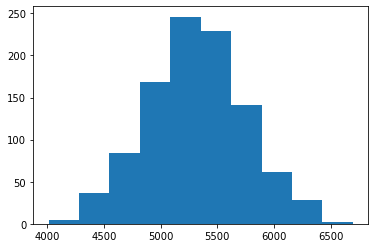

In [160]:
#Гистограмма распределения средних. Практически идеально соответствует нормальному распределению
plt.subplot()
plt.hist(means)
plt.show()

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [138]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [145]:
v, w = np.linalg.eig(m)

print(f'Собственные значения: {v}')

print(f'Собственный вектор: {np.array([w[0][0], w[1][0]])}')

print(f'Собственный вектор: {np.array([w[0][1], w[1][1]])}')

Собственные значения: [ 3. -1.]
Собственный вектор: [0.89442719 0.4472136 ]
Собственный вектор: [-0.89442719  0.4472136 ]


На самом деле собственными векторами для матрицы m являются любые, соответствующие условиям (-2x; x) при собственном значении -1 и (2x; x) при собственном значении 3.